### END-TO-END CASE STUDY:

##### ・Preprocess and prepare data to feed into a machine learning classification algorithm.  
##### ・Evaluate your classifier against the most commonly used classification metrics.  
##### ・Optimize the parameters of a machine learning classifier.  
##### ・Plot confusion matrix and ROC curve.

### Evaluation:

##### Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import math

%matplotlib inline

In [43]:
df = pd.read_csv("C:/Users/yoneta/Desktop/FTDS/Foundation/Group Project/2nd Project/Group3  2nd Project/adult.data", names = ["age","workclass","State-gov","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country"])

df.head()

,age,workclass,State-gov,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
State-gov         32561 non-null int64
fnlwgt            32561 non-null object
education         32561 non-null int64
education_num     32561 non-null object
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null int64
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null object
native_country    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [45]:
df.describe()

,age,State-gov,education,sex,capital_gain,capital_loss
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [46]:
missing = df.isnull().sum()
missing

age               0
workclass         0
State-gov         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

#### No check - age, State-gov	

In [ ]:
df["education"].value_counts().plot.bar(figsize=(10, 6), colormap="Accent", grid=True, fontsize=12)
plt.title("education", fontsize=15)
df["education"].value_counts(dropna=False)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

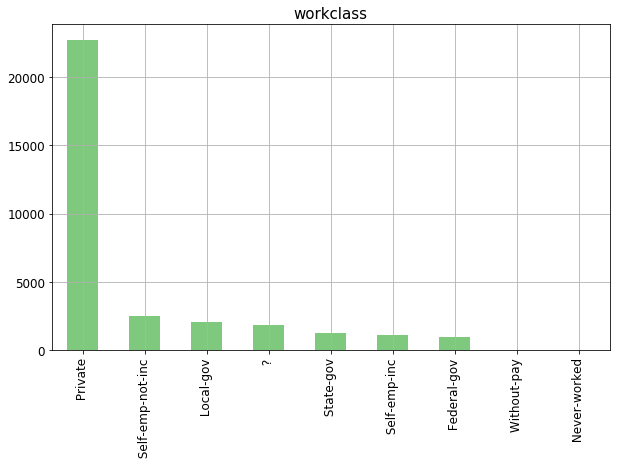

In [53]:
df["workclass"].value_counts().plot.bar(figsize=(10, 6), colormap="Accent", grid=True, fontsize=12)
plt.title("workclass", fontsize=15)
df["workclass"].value_counts(dropna=False)

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education, dtype: int64

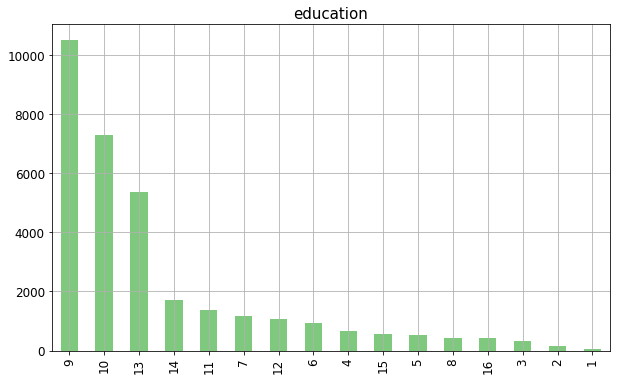

In [51]:
df["education"].value_counts().plot.bar(figsize=(10, 6), colormap="Accent", grid=True, fontsize=12)
plt.title("education", fontsize=15)
df["education"].value_counts(dropna=False)

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: education_num, dtype: int64

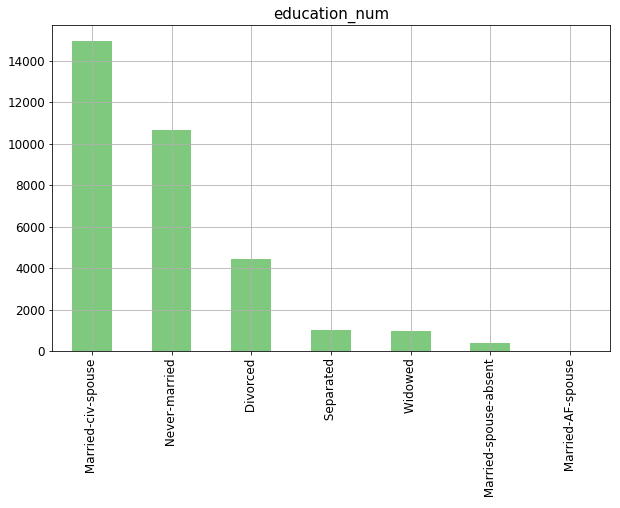

In [52]:
df["education_num"].value_counts().plot.bar(figsize=(10, 6), colormap="Accent", grid=True, fontsize=12)
plt.title("education_num", fontsize=15)
df["education_num"].value_counts(dropna=False)

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: marital_status, dtype: int64

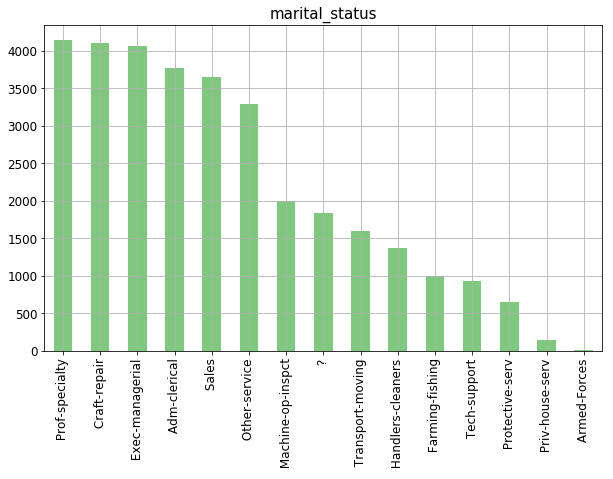

In [54]:
df["marital_status"].value_counts().plot.bar(figsize=(10, 6), colormap="Accent", grid=True, fontsize=12)
plt.title("marital_status", fontsize=15)
df["marital_status"].value_counts(dropna=False)

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: occupation, dtype: int64

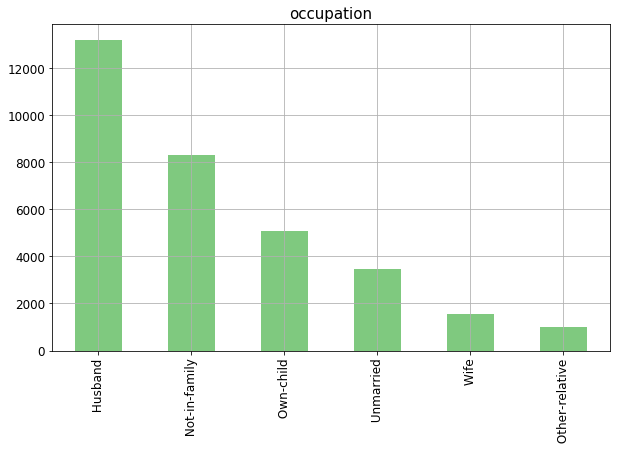

In [55]:
df["occupation"].value_counts().plot.bar(figsize=(10, 6), colormap="Accent", grid=True, fontsize=12)
plt.title("occupation", fontsize=15)
df["occupation"].value_counts(dropna=False)

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: relationship, dtype: int64

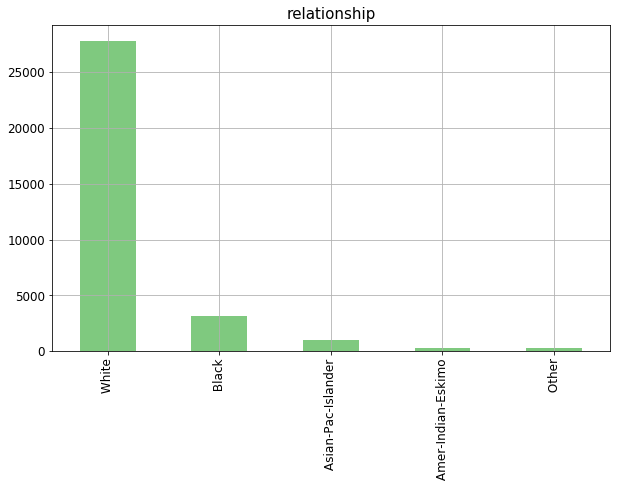

In [56]:
df["relationship"].value_counts().plot.bar(figsize=(10, 6), colormap="Accent", grid=True, fontsize=12)
plt.title("relationship", fontsize=15)
df["relationship"].value_counts(dropna=False)

 Male      21790
 Female    10771
Name: race, dtype: int64

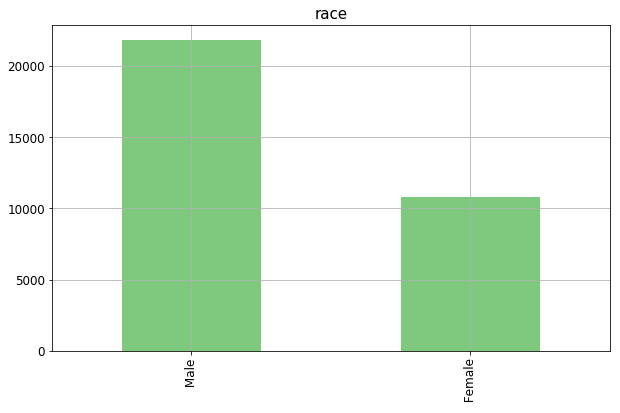

In [57]:
df["race"].value_counts().plot.bar(figsize=(10, 6), colormap="Accent", grid=True, fontsize=12)
plt.title("race", fontsize=15)
df["race"].value_counts(dropna=False)

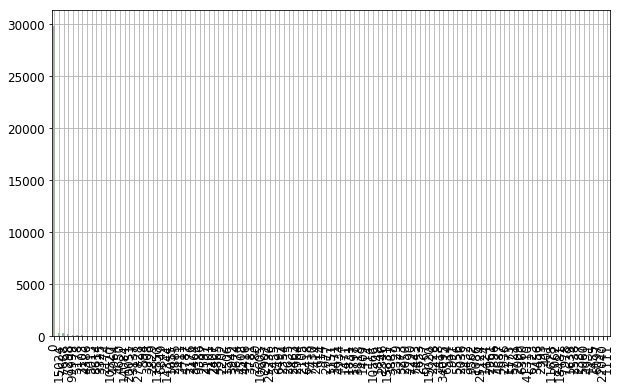

In [59]:
df["sex"].value_counts().plot.bar(figsize=(10, 6), colormap="Accent", grid=True, fontsize=12)
#plt.title("sex", fontsize=15)
#df["sex"].value_counts(dropna=False)

Extraction was done by Barry Becker from the 1994 Census database.   
A set of reasonably clean records was extracted using the following conditions:   
((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))  
Prediction task is to determine whether a person makes over 50K a year.Link to dataset:           https://archive.ics.uci.edu/ml/datasets/Census+IncomeAttribute 

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, 

Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-

clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, 

China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, 

Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.